In [446]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock/MicrosoftStock.csv


In [447]:
data=pd.read_csv('/kaggle/input/microsoft-stock/MicrosoftStock.csv')
data.head(50)

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.3500,27.7100,27.310,27.550,33318306,MSFT
1,390199,2013-02-11,27.6500,27.9200,27.500,27.860,32247549,MSFT
2,390200,2013-02-12,27.8800,28.0000,27.750,27.880,35990829,MSFT
3,390201,2013-02-13,27.9300,28.1100,27.880,28.030,41715530,MSFT
4,390202,2013-02-14,27.9200,28.0600,27.870,28.040,32663174,MSFT
5,390203,2013-02-15,28.0400,28.1600,27.875,28.010,49650538,MSFT
6,390204,2013-02-19,27.8801,28.0900,27.800,28.045,38804616,MSFT
7,390205,2013-02-20,28.1300,28.2000,27.830,27.870,44109412,MSFT
8,390206,2013-02-21,27.7400,27.7400,27.230,27.490,49078338,MSFT
9,390207,2013-02-22,27.6800,27.7600,27.480,27.760,31425726,MSFT


In [448]:
data.isna().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [449]:
print(data.info)
print(data.describe)

<bound method DataFrame.info of        index        date   open    high      low  close    volume  Name
0     390198  2013-02-08  27.35  27.710  27.3100  27.55  33318306  MSFT
1     390199  2013-02-11  27.65  27.920  27.5000  27.86  32247549  MSFT
2     390200  2013-02-12  27.88  28.000  27.7500  27.88  35990829  MSFT
3     390201  2013-02-13  27.93  28.110  27.8800  28.03  41715530  MSFT
4     390202  2013-02-14  27.92  28.060  27.8700  28.04  32663174  MSFT
...      ...         ...    ...     ...      ...    ...       ...   ...
1254  391452  2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT
1255  391453  2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT
1256  391454  2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT
1257  391455  2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT
1258  391456  2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT

[1259 rows x 8 columns]>
<bound method NDFrame.describe of        index        date   open    high     

In [450]:
numeric_cols=list(data.select_dtypes('number').columns)
categorical_cols=list(data.select_dtypes('object').columns)
print(numeric_cols)
print(categorical_cols)

['index', 'open', 'high', 'low', 'close', 'volume']
['date', 'Name']


<Axes: >

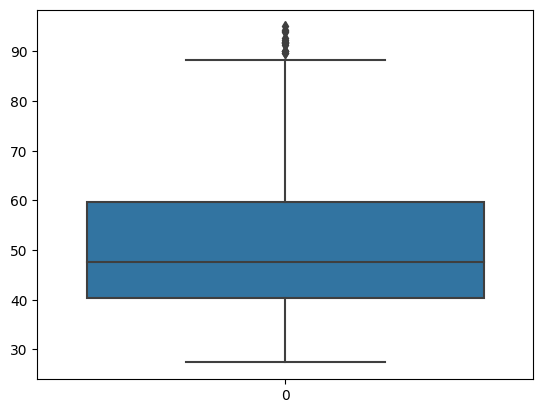

In [451]:
sns.boxplot(data['close'])

In [452]:
dataset_IQR=data['close']
Q1=dataset_IQR.quantile(0.25)
Q3=dataset_IQR.quantile(0.75)
IQR=Q3-Q1
print(IQR,Q1,Q3)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data.loc[(data['close']>upper_limit),'close']=upper_limit
data.loc[(data['close']<lower_limit),'close']=lower_limit
data.head(50)

19.419999999999995 40.31 59.73


,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.3500,27.7100,27.310,27.550,33318306,MSFT
1,390199,2013-02-11,27.6500,27.9200,27.500,27.860,32247549,MSFT
2,390200,2013-02-12,27.8800,28.0000,27.750,27.880,35990829,MSFT
3,390201,2013-02-13,27.9300,28.1100,27.880,28.030,41715530,MSFT
4,390202,2013-02-14,27.9200,28.0600,27.870,28.040,32663174,MSFT
5,390203,2013-02-15,28.0400,28.1600,27.875,28.010,49650538,MSFT
6,390204,2013-02-19,27.8801,28.0900,27.800,28.045,38804616,MSFT
7,390205,2013-02-20,28.1300,28.2000,27.830,27.870,44109412,MSFT
8,390206,2013-02-21,27.7400,27.7400,27.230,27.490,49078338,MSFT
9,390207,2013-02-22,27.6800,27.7600,27.480,27.760,31425726,MSFT


<Axes: >

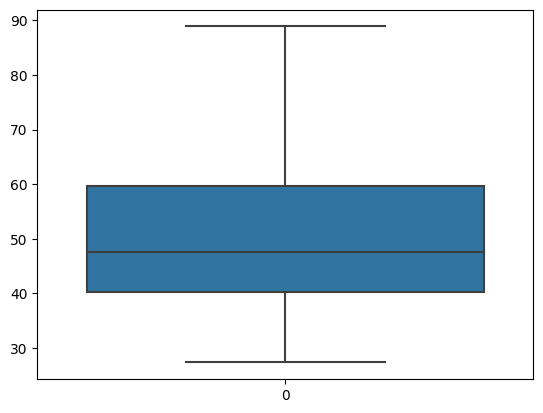

In [453]:
sns.boxplot(data['close'])

In [454]:
dataset_IQR=data['open']
Q1=dataset_IQR.quantile(0.25)
Q3=dataset_IQR.quantile(0.75)
IQR=Q3-Q1
print(IQR,Q1,Q3)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data.loc[(data['open']>upper_limit),'open']=upper_limit
data.loc[(data['open']<lower_limit),'open']=lower_limit
data.head(50)

19.65 40.305 59.955


,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.3500,27.7100,27.310,27.550,33318306,MSFT
1,390199,2013-02-11,27.6500,27.9200,27.500,27.860,32247549,MSFT
2,390200,2013-02-12,27.8800,28.0000,27.750,27.880,35990829,MSFT
3,390201,2013-02-13,27.9300,28.1100,27.880,28.030,41715530,MSFT
4,390202,2013-02-14,27.9200,28.0600,27.870,28.040,32663174,MSFT
5,390203,2013-02-15,28.0400,28.1600,27.875,28.010,49650538,MSFT
6,390204,2013-02-19,27.8801,28.0900,27.800,28.045,38804616,MSFT
7,390205,2013-02-20,28.1300,28.2000,27.830,27.870,44109412,MSFT
8,390206,2013-02-21,27.7400,27.7400,27.230,27.490,49078338,MSFT
9,390207,2013-02-22,27.6800,27.7600,27.480,27.760,31425726,MSFT


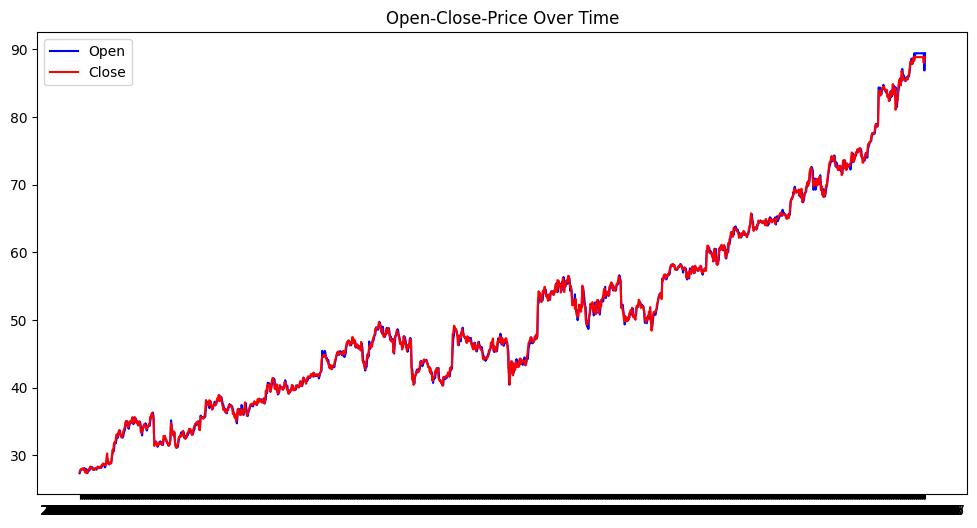

In [455]:
#plot1 Open and Close Prices of Time
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['open'],label='Open',color='blue')
plt.plot(data['date'],data['close'],label='Close',color='red')
plt.title("Open-Close-Price Over Time")
plt.legend()
plt.show()

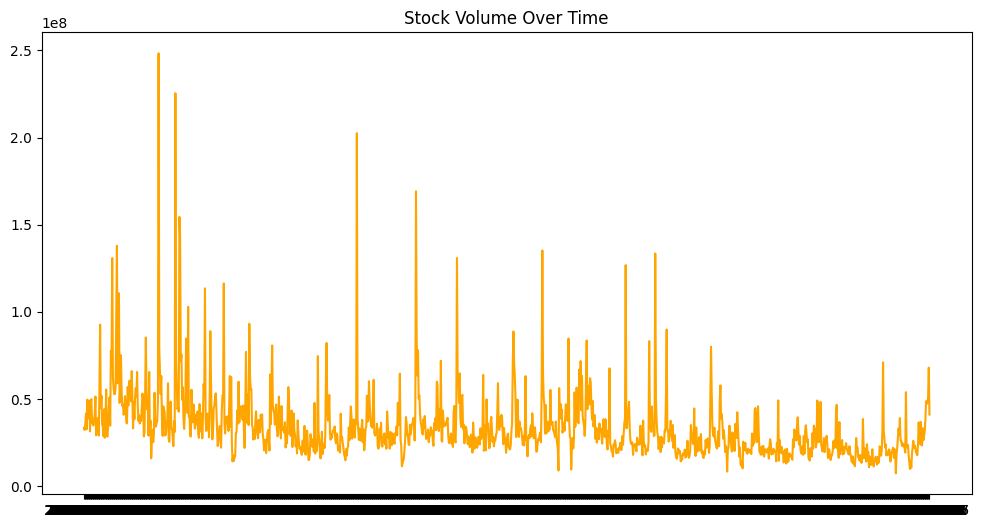

In [456]:
#plot2 Trading Volume (check for Outliers) 
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label='Volume',color='orange')
plt.title('Stock Volume Over Time')
plt.show()

In [457]:
#Drop non-numeric columns 
numeric_data=data.select_dtypes(include=['int64','float64'])

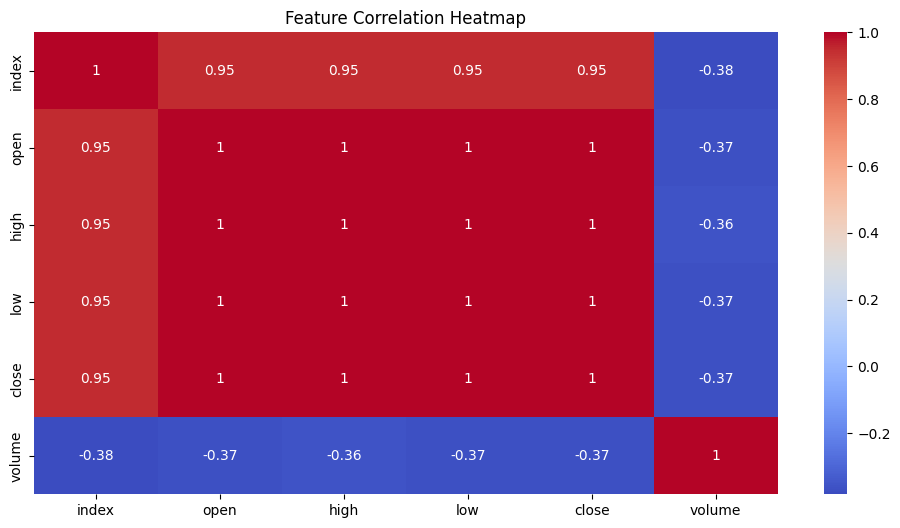

In [458]:
#plot3 Check for Correlation between Features
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Price Over Time')

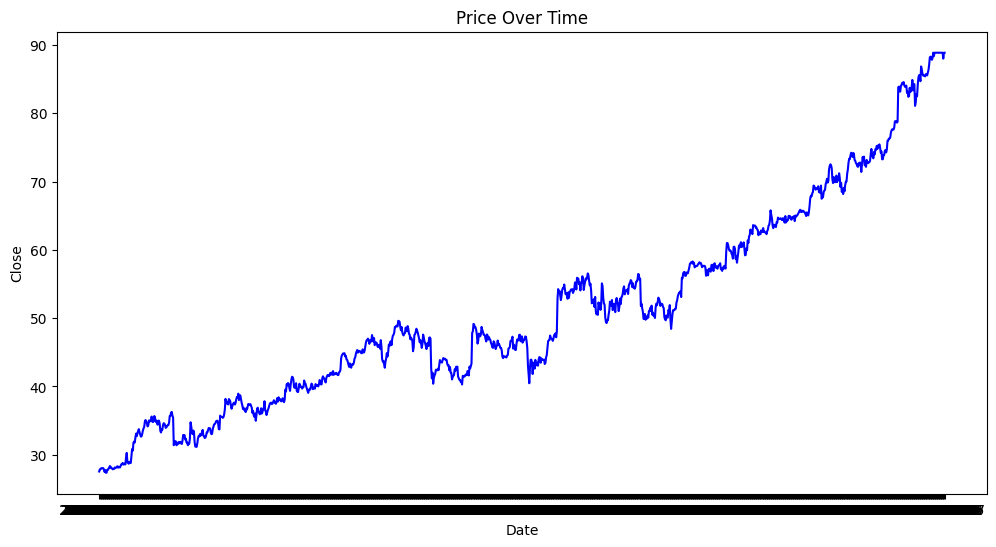

In [459]:
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['close'],color='blue')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Price Over Time')

In [460]:
stock_close=data['close']
dataset=np.array(stock_close.values).reshape(-1,1)

In [461]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[-1.59228799],
       [-1.57126061],
       [-1.569904  ],
       ...,
       [ 2.50805103],
       [ 2.56638505],
       [ 2.56638505]])

In [462]:
train_data_len=int(np.ceil(len(dataset)*0.7))
train_data=scaled_data[:train_data_len]
train_data

array([[-1.59228799e+00],
       [-1.57126061e+00],
       [-1.56990400e+00],
       [-1.55972946e+00],
       [-1.55905116e+00],
       [-1.56108607e+00],
       [-1.55871201e+00],
       [-1.57058231e+00],
       [-1.59635780e+00],
       [-1.57804363e+00],
       [-1.60449743e+00],
       [-1.60449743e+00],
       [-1.57465212e+00],
       [-1.57533042e+00],
       [-1.56515588e+00],
       [-1.55158983e+00],
       [-1.53802378e+00],
       [-1.55565965e+00],
       [-1.55226814e+00],
       [-1.56176437e+00],
       [-1.57058231e+00],
       [-1.56786909e+00],
       [-1.56752994e+00],
       [-1.55260729e+00],
       [-1.55939031e+00],
       [-1.55498135e+00],
       [-1.54955493e+00],
       [-1.54039784e+00],
       [-1.55430304e+00],
       [-1.54480681e+00],
       [-1.55091153e+00],
       [-1.55125068e+00],
       [-1.53666718e+00],
       [-1.52072707e+00],
       [-1.52038792e+00],
       [-1.50750017e+00],
       [-1.52377943e+00],
       [-1.52140537e+00],
       [-1.5

In [463]:
X_train,y_train=[],[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [464]:
from keras.layers import LSTM
model=keras.models.Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_81 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,017 (250.07 KB)

 Trainable params: 64,017 (250.07 KB)

 Non-trainable params: 0 (0.00 B)

In [465]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',loss='mae',metrics=['RootMeanSquaredError','R2Score'])

In [472]:
train=model.fit(X_train,y_train,epochs=60,batch_size=16,shuffle=True)
train

Epoch 1/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - R2Score: 0.9880 - RootMeanSquaredError: 0.0511 - loss: 0.0345
Epoch 2/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - R2Score: 0.9896 - RootMeanSquaredError: 0.0483 - loss: 0.0330
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - R2Score: 0.9858 - RootMeanSquaredError: 0.0555 - loss: 0.0402
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - R2Score: 0.9860 - RootMeanSquaredError: 0.0535 - loss: 0.0371
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - R2Score: 0.9894 - RootMeanSquaredError: 0.0480 - loss: 0.0347
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - R2Score: 0.9863 - RootMeanSquaredError: 0.0537 - loss: 0.0347
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - R2Score: 0.9887 - RootMeanSquaredError: 0.0496 - loss: 0.0336
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - R2Score: 0.9881 - RootMeanSquaredError: 0.0512 - loss: 0.0371
Epoch 9/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - R2Score: 0.9875 - RootMeanS

In [474]:
test_data=scaled_data[train_data_len:]
test_data

array([[0.47449993],
       [0.49349241],
       [0.46907351],
       [0.48128296],
       [0.43515838],
       [0.44329802],
       [0.44601123],
       [0.44736783],
       [0.45075934],
       [0.465682  ],
       [0.46975182],
       [0.48467447],
       [0.47517824],
       [0.47992635],
       [0.465682  ],
       [0.43651499],
       [0.44533292],
       [0.45075934],
       [0.44668953],
       [0.45008104],
       [0.43448008],
       [0.35172717],
       [0.40870458],
       [0.37343285],
       [0.35511868],
       [0.41820082],
       [0.42227064],
       [0.40056495],
       [0.39242532],
       [0.45686407],
       [0.46093388],
       [0.43448008],
       [0.39853005],
       [0.46975182],
       [0.47517824],
       [0.43244517],
       [0.44601123],
       [0.43380178],
       [0.42159233],
       [0.44872444],
       [0.45550746],
       [0.45957728],
       [0.47585654],
       [0.41820082],
       [0.4127744 ],
       [0.39988665],
       [0.43380178],
       [0.420

In [475]:
X_test,y_test=[],[]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

X_test,y_test=np.array(X_test),np.array(y_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [480]:
model.save('LSTM94.keras')

In [483]:
import tensorflow as tf
model1=tf.keras.models.load_model('/kaggle/working/LSTM94.keras')

In [484]:
y_predict=model1.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [485]:
y_predict

array([[0.6322223 ],
       [0.6313044 ],
       [0.6114692 ],
       [0.71999544],
       [0.73778737],
       [0.7162593 ],
       [0.6147624 ],
       [0.59969443],
       [0.5349721 ],
       [0.55784774],
       [0.60093427],
       [0.6605915 ],
       [0.6489347 ],
       [0.6612179 ],
       [0.6676161 ],
       [0.62283015],
       [0.62002206],
       [0.6311061 ],
       [0.6749212 ],
       [0.64529085],
       [0.59071594],
       [0.5924299 ],
       [0.66725624],
       [0.67332727],
       [0.7528096 ],
       [0.7455956 ],
       [0.7893208 ],
       [0.80138516],
       [0.83543676],
       [0.81459785],
       [0.7966821 ],
       [0.7759502 ],
       [0.8497846 ],
       [0.8683083 ],
       [0.87932706],
       [0.8919271 ],
       [0.88945687],
       [0.90117306],
       [0.89695406],
       [0.8989551 ],
       [0.8619739 ],
       [0.8757366 ],
       [0.86175907],
       [0.8527428 ],
       [0.87032795],
       [0.85616887],
       [0.84155333],
       [0.857

In [486]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
mae=mean_absolute_error(y_test, y_predict)
print(mae)
r2 = r2_score(y_test, y_predict)
print("R2 score:", r2)

0.13840792886365658
0.09832307058710658
R2 score: 0.9452668579338233
